<a href="https://colab.research.google.com/github/Isela-Galo-Tech/Alura_arquitectura_css/blob/main/Transferencia_de_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Transferencia de Aprendizaje / Transfer Learning

In [2]:
#Crear nuestro propio conjunto de datos

In [3]:
!unzip agua/agua.zip -d agua

Archive:  agua/agua.zip
   creating: agua/pokemon agua/
  inflating: agua/pokemon agua/0191726382140_1.jpg  
  inflating: agua/pokemon agua/041781f8973fef90f471ce52582d1468.jpg  
  inflating: agua/pokemon agua/060.png  
  inflating: agua/pokemon agua/0bd091f5a0aaad2d43e8c0756e1518af90fc8468_00.jpg  
  inflating: agua/pokemon agua/1200px-Ondulagua.png  
  inflating: agua/pokemon agua/183-marill.png  
  inflating: agua/pokemon agua/19c9570e-0e84-4880-9789-920cf32768c4.c83b81559f8057316c276fffb36ff587.jpeg  
  inflating: agua/pokemon agua/202061111595154_1.jpg  
  inflating: agua/pokemon agua/3EXX7YTLANERJIKVXFOIY5PY5I.jpg  
  inflating: agua/pokemon agua/4269171626552352.png  
  inflating: agua/pokemon agua/43556-h.jpg  
  inflating: agua/pokemon agua/640px-PokC3A9mon_de_tipo_agua.jpg  
  inflating: agua/pokemon agua/738b4867c0338fca578c977e47a6b3914a33e136_hq.jpg  
  inflating: agua/pokemon agua/800px-Lapras.png  
  inflating: agua/pokemon agua/800px-Vaporeon.png  
  inflating: agua/pok

In [4]:
!unzip fuego/fuego.zip -d fuego

Archive:  fuego/fuego.zip
   creating: fuego/pokemon fuego/
  inflating: fuego/pokemon fuego/01-INICIAL-FUEGO.png  
  inflating: fuego/pokemon fuego/0b6b61453168a54285e7fcfa17b51007.jpg  
  inflating: fuego/pokemon fuego/126-magmar.png  
  inflating: fuego/pokemon fuego/1695171207058f8b439f40052ed1657a595b83d75655d.jpg  
  inflating: fuego/pokemon fuego/202466832482_1.jpg  
  inflating: fuego/pokemon fuego/255-torchic.png  
  inflating: fuego/pokemon fuego/2dd1b0a38f2a4b752cde92a96acd5813.jpg  
  inflating: fuego/pokemon fuego/30ae92f0202737aecca45d4689a3fe29.jpg  
  inflating: fuego/pokemon fuego/325126b4fe3ceed2ca8d93db4249ad77b6cb48ed_hq.jpg  
  inflating: fuego/pokemon fuego/327f5297-fb9c-430c-a848-1d414b553d0f.2832ca247b48d45ce48ebdfe761b4d98.jpeg  
  inflating: fuego/pokemon fuego/375_375.webp  
  inflating: fuego/pokemon fuego/379c3d70b8565884e80e1336f33ca190f4d0945b_hq.jpg  
  inflating: fuego/pokemon fuego/39f895ceb924b3d1c1393fe41b950e28.jpg  
  inflating: fuego/pokemon fuego

In [5]:
!rm -rf agua/agua.zip
!rm -rf fuego/fuego.zip

In [6]:
#Crear un set de datos (ya no en memoria) crea un set de datos en otra carpeta

!mkdir dataset
!cp -r agua dataset/agua
!cp -r fuego dataset/fuego

In [7]:
#Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 10,
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 387 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


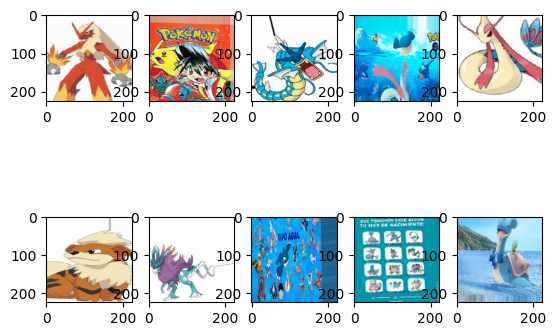

In [8]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [9]:
import tensorflow as tf
import tensorflow_hub as hub

url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [10]:
#Importante
#Congelar las capas
mobilenetv2.trainable = False

In [11]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation="softmax")
])

In [12]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 0.9125 - accuracy: 0.5194

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 15s 676ms/step - loss: 0.9125 - accuracy: 0.5194 - val_loss: 0.7997 - val_accuracy: 0.5368
Epoch 2/20
13/13 [==============================] - 8s 615ms/step - loss: 0.6845 - accuracy: 0.6202 - val_loss: 0.5023 - val_accuracy: 0.7263
Epoch 3/20
13/13 [==============================] - 7s 515ms/step - loss: 0.5407 - accuracy: 0.7390 - val_loss: 0.4276 - val_accuracy: 0.8211
Epoch 4/20
13/13 [==============================] - 8s 583ms/step - loss: 0.4203 - accuracy: 0.8140 - val_loss: 0.3464 - val_accuracy: 0.8526
Epoch 5/20
13/13 [==============================] - 7s 552ms/step - loss: 0.3861 - accuracy: 0.8295 - val_loss: 0.3213 - val_accuracy: 0.8737
Epoch 6/20
13/13 [==============================] - 7s 519ms/step - loss: 0.3460 - accuracy: 0.8553 - val_loss: 0.3045 - val_accuracy: 0.8947
Epoch 7/20
13/13 [==============================] - 8s 609ms/step - loss: 0.3557 - accuracy: 0.8320 - val_loss: 0.2696 - val_accuracy: 0.9263
Epoch 8/20
13/13

In [14]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [15]:
ruta = "agua.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 1s 1s/step
0


In [17]:
ruta = "fuego.jpg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 0s 76ms/step
1
